<a href="https://colab.research.google.com/github/therealGARRETTKEYT/CS4410/blob/main/CS4410FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# --- Update these paths to your image folders ---
known_dir = '/content/drive/MyDrive/known/known'
unknown_dir = '/content/drive/MyDrive/unknown/unknown'
# ------------------------------------------------

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

known_encodings = []
known_names = []

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

for file in os.listdir(unknown_dir):
  print("Processing", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1)
      cv2_imshow(img)

  # print(results)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing Zydrunas_Ilgauskas_0001.jpg
[False, False, False, False, False, False]
Processing Adam_Sandler_0004.jpg


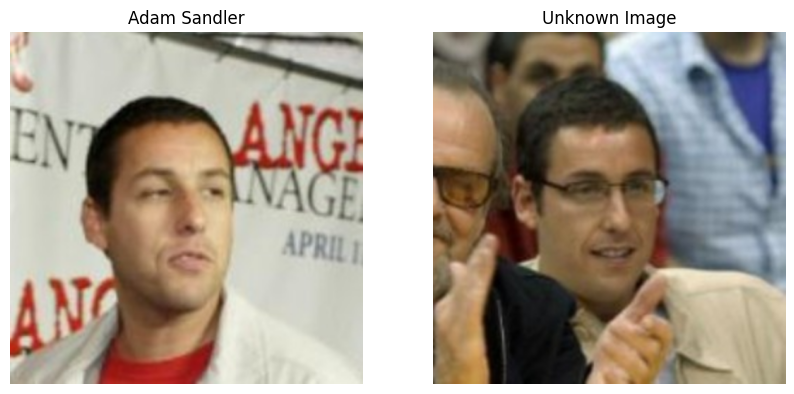

Match found: Adam Sandler
[False, False, True, False, False, False]
Processing Aaron_Peirsol_0003.jpg


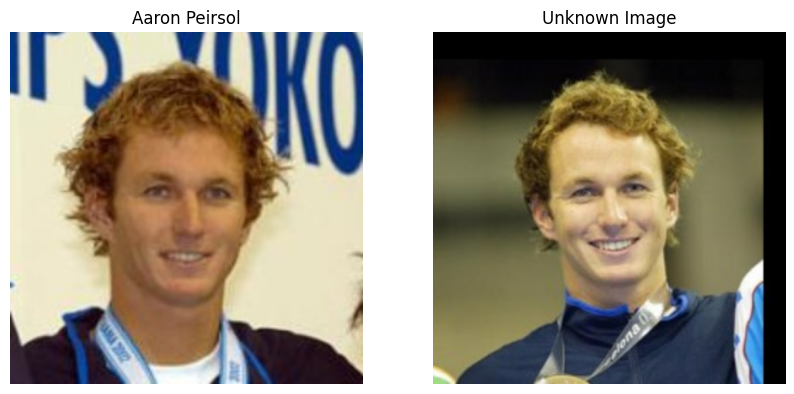

Match found: Aaron Peirsol
[False, True, False, False, False, False]
Processing Ben_Affleck_0007.jpg


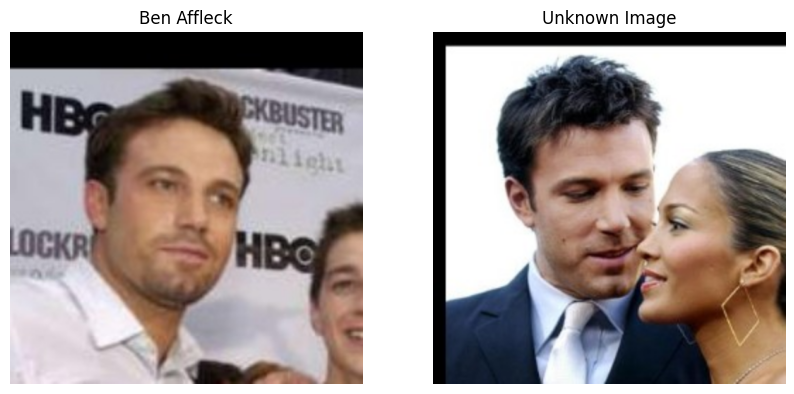

Match found: Ben Affleck
[False, False, False, True, False, False]
Processing Adam_Scott_0002.jpg


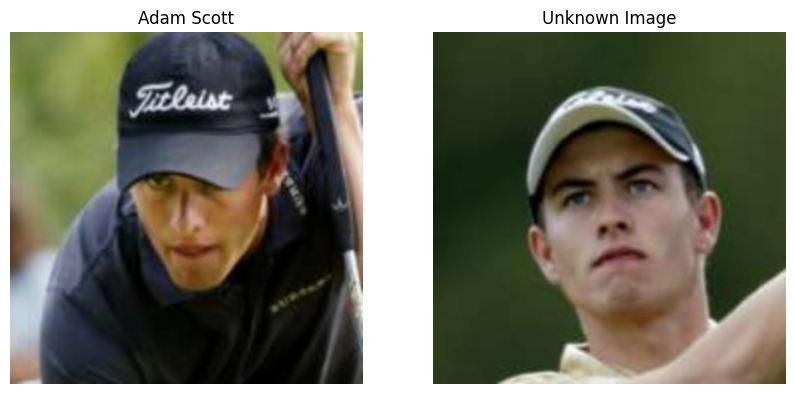

Match found: Adam Scott
[True, False, False, False, False, False]


In [9]:
!pip install face_recognition
import face_recognition
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# --- Update these paths to your image folders ---
known_dir = '/content/drive/MyDrive/known/known'
unknown_dir = '/content/drive/MyDrive/unknown/unknown'
# ------------------------------------------------

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_images = []

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    known_images.append(img)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

for file in os.listdir(unknown_dir):
    print("Processing", file)
    unknown_img = read_img(unknown_dir + '/' + file)
    unknown_img_enc = face_recognition.face_encodings(unknown_img)[0]

    results = face_recognition.compare_faces(known_encodings, unknown_img_enc)

    for i in range(len(results)):
        if results[i]:
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            axes[0].imshow(cv2.cvtColor(known_images[i], cv2.COLOR_BGR2RGB))
            axes[0].set_title(known_names[i])
            axes[0].axis('off')
            axes[1].imshow(cv2.cvtColor(unknown_img, cv2.COLOR_BGR2RGB))
            axes[1].set_title("Unknown Image")
            axes[1].axis('off')
            plt.show()

            print(f"Match found: {known_names[i]}")

    print(results)